<a href="https://colab.research.google.com/github/ethantlogan/FWE_458/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

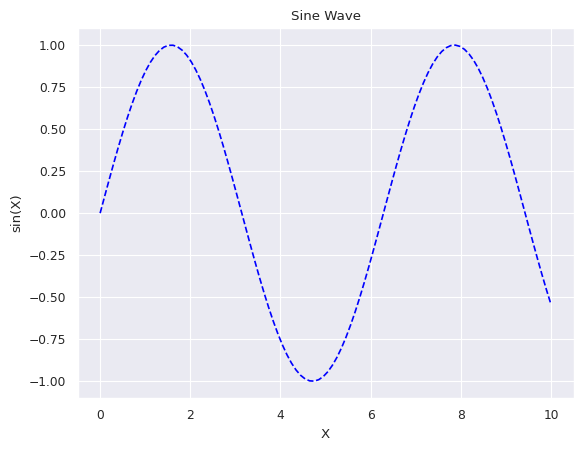

In [182]:
import matplotlib.pyplot as plt
import numpy as np

#Copying the values from the homework assignment
x = np.linspace(0, 10, 100)
y = np.sin(x)

#Plotting the x and y values and using linestyle and color to change how the
#line looks
plt.plot(x, y, linestyle = "--", color = "blue")

#Creating a title for the graph
plt.title('Sine Wave')

#Creating titles for the axes
plt.xlabel('X')
plt.ylabel('sin(X)')


#Creating a grid overlay
plt.grid(True)

plt.show()

In [147]:
import seaborn as sns

#Uploading the data from seaborn into a dataframe and displaying it
tips1 = sns.load_dataset("tips")

tips1



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [148]:
import matplotlib.pyplot as plt
plt.rc('font', size=1) # Set the default font size

Text(0, 0.5, 'Frequency')

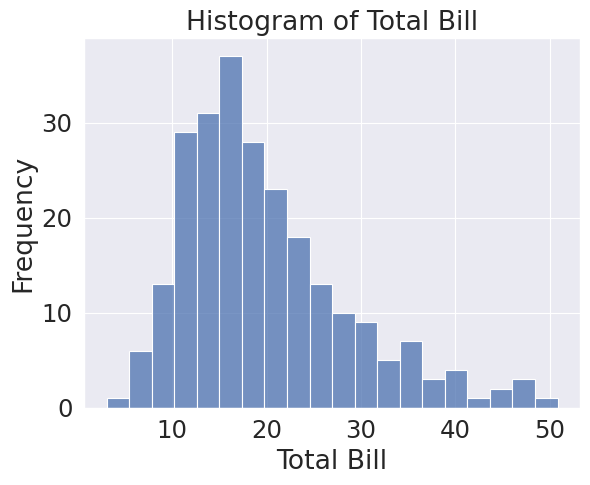

In [129]:
import matplotlib.pyplot as plt

#Creating a histogram fro, the total_bill section of the DF
#Setting bin number
sns.histplot(data = tips1,
             x = "total_bill",
             bins = 20)

#Creating titles for the graph and axes
plt.title("Histogram of Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

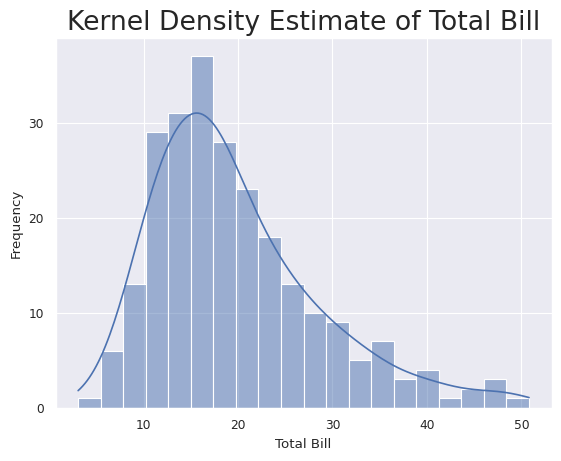

In [183]:
#This creates a new histogram plot, and overlays the Kernel Density Estimate
#on top of the histogram, using the same data and bin size as before
sns.histplot(data = tips1,
            x = "total_bill",
             kde = True,
             bins = 20)

#Context helps with font size
sns.set_context("paper", font_scale=2)

#Creating graph and axes titles
plt.title("Kernel Density Estimate of Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")

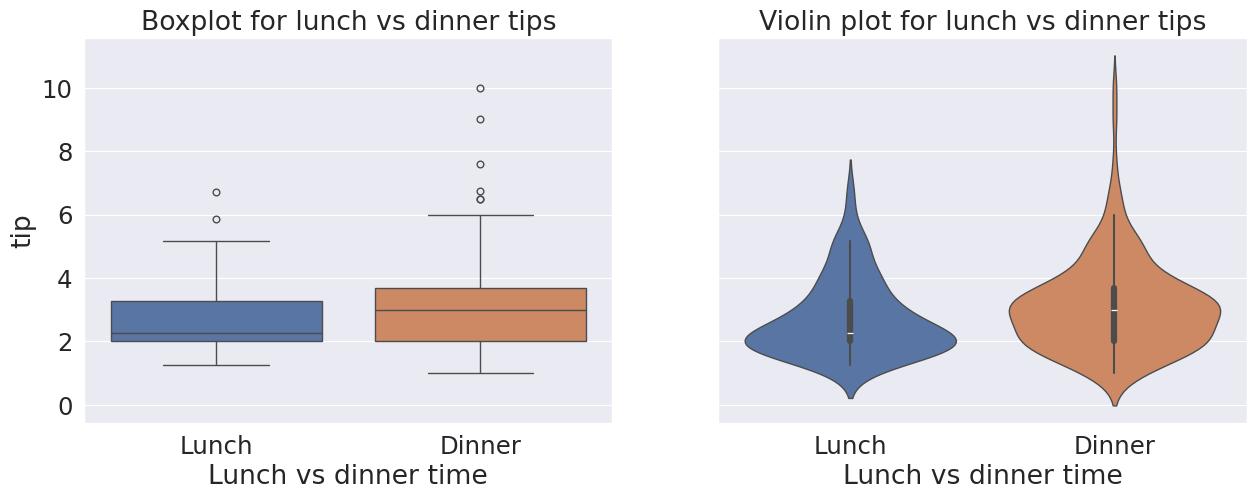

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#This creates two figures on seperate axes, but sharey ensures they share
#the same axes numbers and size, and figsize determines the size of the figures
fig, axes = plt.subplots(1, 2, figsize = (15, 5), sharey = True)

#All of this just sets titles for axes and graphs
axes[0].set_title("Boxplot for lunch vs dinner tips")
axes[1].set_title("Violin plot for lunch vs dinner tips")
axes[0].set_xlabel("Lunch vs dinner time")
axes[1].set_xlabel("Lunch vs dinner time")
axes[0].set_ylabel("")
axes[1].set_ylabel("")

#This creates two seperate violin and boxplots, both of which compate time to
#tip and uses the variable time to create two of each on the graphs, leading
#to direct comparison of qualitative data
sns.boxplot(ax = axes[0], data=tips1, x = "time", y = "tip", hue = "time")
sns.violinplot(ax = axes[1], data=tips1, x = "time", y = "tip", hue = "time")
sns.set_context("paper", font_scale=2)

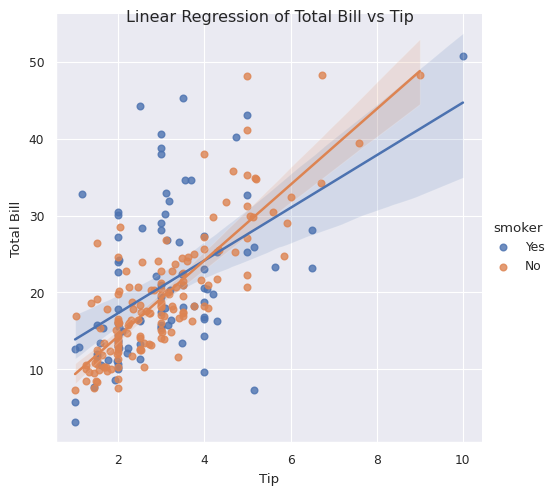

In [140]:
#This creates a scatter plot with linear regression function built it
#It compares the tip vs total_bill data and uses the smoker variable to
#compare two different groups of data based on the smoker categories
#order determines the exponent of the x in the linear function
g = sns.lmplot(data = tips1, x = "tip", y = "total_bill", hue = "smoker", order = 1)
#This creates titles for the graph and axes
g.fig.suptitle("Linear Regression of Total Bill vs Tip")
g.set_xlabels("Tip")
g.set_ylabels("Total Bill")

sns.set_context("paper", font_scale=0.5)

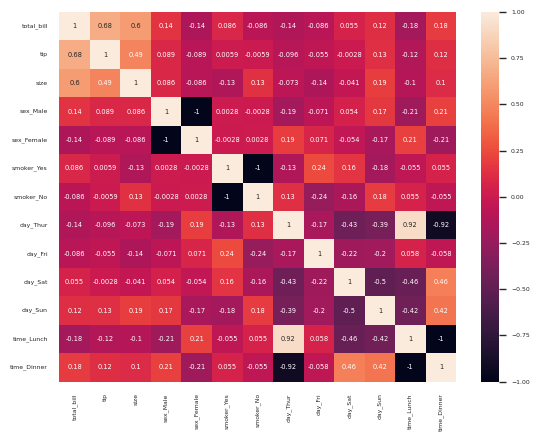

In [145]:

import pandas as pd
import seaborn as sns

#This creates a new DF, as the future steps for this code will be altering the
#DF and I didn't want to alter the original DF as that would make later steps
#harder.
tips2 = sns.load_dataset("tips")

tips2
#In order to directly compare all values from the tips DF, I needed to convert
#columns that used words instead of values like sex, smoker, day, and time into
#values that were numerical but still represented what type of word it was in
#the original DF. If I hadn't done this, seaborn would've only compared the
#values that were made of numbers.
# Convert 'sex' and 'smoker' columns to numerical representation using pd.get_dummies
#I do this with the get_dummies function that takes certain columns from the
#DF and creates new columns based on all the different types of data in the
#original columns. For example, it creates two new columns for sex: sex_Male and
#sex_Female. It then assigns a 1 to the value that it was in the original DF and
#a 0 to the other columns. This creates new columns for every qualitative value
#but allows comparison to quantitative data.
tips2 = pd.get_dummies(tips2, columns=['sex', 'smoker', 'day', 'time'], prefix=['sex', 'smoker', 'day', 'time'])

#This calculates the correlation matrix using the DF and the correlation function
corr_matrix = tips2.corr()

#This then plots a heatmap using seaborn and the correlation function above,
#and makes annotation true so the correlation values are shown on the heatmap.
#Seaborn automatically created the color scheme, but it can be changed if I
#wanted a different color layout.
sns.heatmap(corr_matrix, annot=True)
sns.set_context("paper", font_scale=0.1)


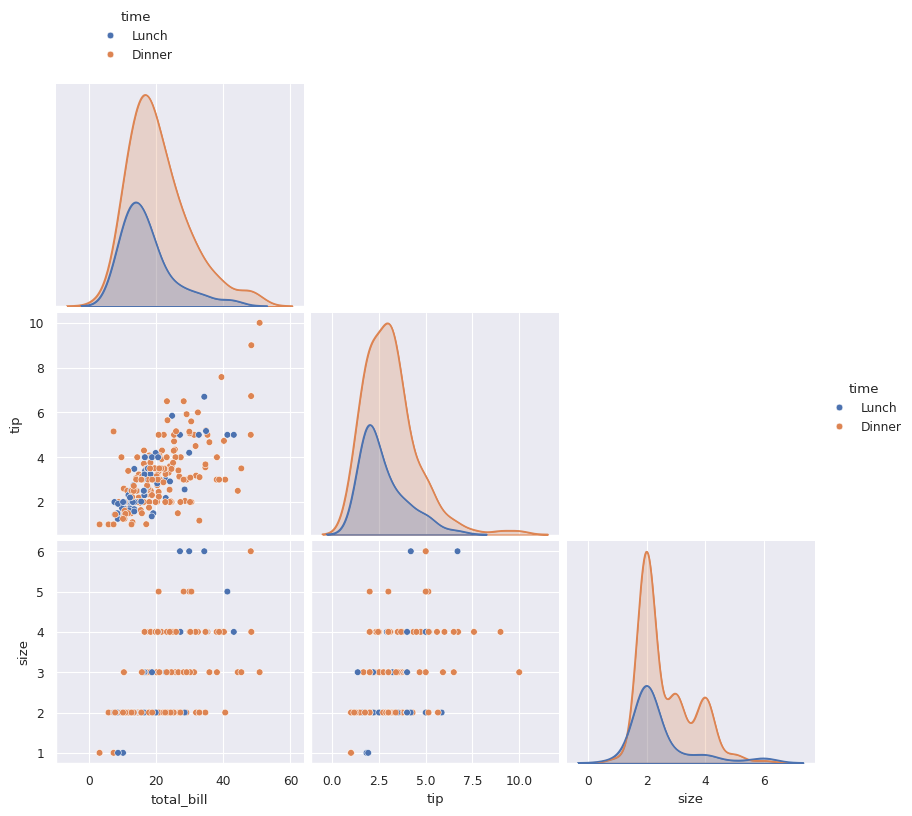

In [181]:
#This creates a function g that uses seaborns pairplot function to create a grid
#of plots that compare all the numerical values from the dataset.
#It uses time as the direct comparison in each plot to determine differences
#between lunch and dinner for each numerical value comparison on the x and y
#axes. It also colors the two different time values automatically.
#It also addes the corner which turns the grid into a triangle grid that has
#a slanted edge to the grid and creates "corners"
#It also creates scatterplot graphs automatically for all the graphs that
#aren't otherwise defined to be another type of graph.
g = sns.pairplot(data = tips1,
                 hue = "time",
                 corner = True)
#This maps out the diagonal sections of the grid to be a certain kind of graph,
#in this case the KDE plots. This fills in the graphs on the diagonal portion
#of the grid with a certain type of plot.
g.map_diag(sns.kdeplot)
sns.set_context("paper", font_scale=1)

#This creates a legend with no frame, and a certain positioning that lines up
#with where the graphs are to give a good view of the legend
g.add_legend(frameon = False)
g.legend.set_bbox_to_anchor((0.2, 1.04))